In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
# Load Dataset
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape
# 50,000 images, 32px by 32px, 3 color channels

(50000, 32, 32, 3)

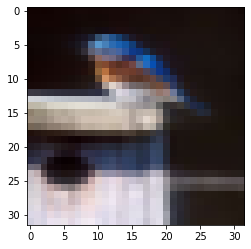

In [5]:
plt.imshow(x_train[13])

## Data Preprocessing

In [6]:
x_train[0].max()

255

In [7]:
# Each image goes from 0-255 for each of the color channels.
# So we will scale
x_train = x_train/255
x_test = x_test/255

In [8]:
# How many images in test set?
x_test.shape

(10000, 32, 32, 3)

In [9]:
# What do our labels look like?
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [10]:
# We should convert to categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [11]:
y_train[0]

array([6], dtype=uint8)

## Model Creation

In [12]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional Layer 
model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))  # Multiclass -> softmax

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])  # keras.io/metrics

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
model.fit(x_train, y_cat_train,
            epochs=20,
            validation_data=(x_test, y_cat_test),
            callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 30s 602us/sample - loss: 1.5309 - accuracy: 0.4450 - val_loss: 1.3216 - val_accuracy: 0.5258
Epoch 2/20
50000/50000 [==============================] - 32s 636us/sample - loss: 1.2006 - accuracy: 0.5757 - val_loss: 1.1638 - val_accuracy: 0.5889
Epoch 3/20
50000/50000 [==============================] - 31s 620us/sample - loss: 1.0453 - accuracy: 0.6331 - val_loss: 1.0421 - val_accuracy: 0.6379
Epoch 4/20
50000/50000 [==============================] - 30s 594us/sample - loss: 0.9350 - accuracy: 0.6728 - val_loss: 1.0149 - val_accuracy: 0.6539
Epoch 5/20
50000/50000 [==============================] - 30s 600us/sample - loss: 0.8451 - accuracy: 0.7035 - val_loss: 0.9601 - val_accuracy: 0.6714
Epoch 6/20
50000/50000 [==============================] - 30s 593us/sample - loss: 0.7677 - accuracy: 0.7327 - val_loss: 0.9830 - val_accuracy: 0.6704
Epoch 7/20
50000/50000 [====================